In [1]:
from __future__ import absolute_import , division , print_function , unicode_literals
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [40]:
!pip install -q git+https://github.com/tensorflow/docs

In [41]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [4]:
x = pd.read_csv("../trgc1000.csv")
y = pd.read_csv("../ffyrgc1000.csv")
x = x.iloc[:,1:]
y = y.iloc[:,[1]]

### Split the data set into train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train ,y_test = train_test_split(x,y)

In [80]:
x_train.shape , y_train.shape,y_train.shape,y_test.shape

((750, 10332), (750, 1), (750, 1), (250, 1))

## Build the Model

In [45]:
x_train.shape

(750, 10332)

In [81]:
def build_model():
    
    model = keras.Sequential([
        layers.Dense(10332,activation = "relu",input_shape = [len(x_train.keys())]),
        #layers.Dense(5,activation = "relu"),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(
    loss = "mse",
    optimizer = optimizer,metrics = ["mae","mse"])

    return model

In [82]:
model = build_model()

In [83]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10332)             106760556 
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 10333     
Total params: 106,770,889
Trainable params: 106,770,889
Non-trainable params: 0
_________________________________________________________________


In [84]:
#Now try out the Model. Take a batch of 10examples from the training data and call model.predict on it
example_batch = np.array(x_train[:10])
example_result = model.predict(example_batch)

In [85]:
#example_result*100

In [ ]:
# Train the Model for 1000 epochs, and record the training and validation accuracy in the history object
EPOCHS = 1000
history = model.fit(np.array(x_train) , np.array(y_train), epochs=EPOCHS , validation_split=0.2,verbose=0)

In [ ]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [ ]:
plotter.plot({"Basic":history},metric= "mae")
plt.ylim([0,10])
plt.ylabel("MAE[FF]")

Text(0, 0.5, 'MSE[FFY2]')

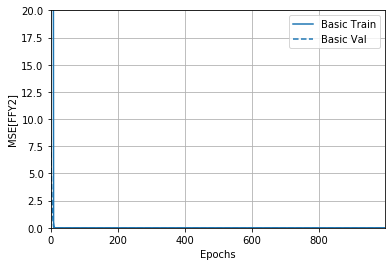

In [56]:
plotter.plot({"Basic":history},metric = "mse")
plt.ylim([0,20])
plt.ylabel("MSE[FFY2]")

### Lets update the model.fit call to automatically stop training when the validation score doesn't improve
WE 'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training
More here

In [62]:
model = build_model()
# The patience Parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=10)

#The patience parameter is the amount of epochs to check for improvement 
early_history = model.fit(np.array(x_train), np.array(y_train), epochs = EPOCHS, validation_split = 0.2, verbose= 0,
                          callbacks = [early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:3895.5511,  mae:16.1742,  mse:3895.5508,  val_loss:0.0145,  val_mae:0.0926,  val_mse:0.0145,  
...........

ValueError: x and y must have same first dimension, but have shapes (11,) and (17,)

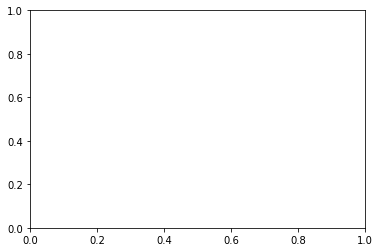

In [63]:
plotter.plot({"Early Stopping":early_history},metric = "mae")
plt.ylim([0,10])

In [65]:
loss , mae , mse = model.evaluate(x_test, y_test , verbose = 2)
print("Testing set Mean Abs Error:{:5.2f}MPG".format(mae))

ValueError: Cannot create an execution function which is comprised of elements from multiple graphs.

### Make Predictions 

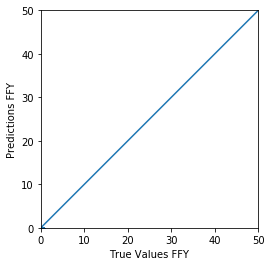

In [70]:
test_predictions = model.predict(np.array(x_test)).flatten()
a = plt.axes(aspect = "equal")
plt.scatter(y_test , test_predictions)
plt.xlabel("True Values FFY")
plt.ylabel("Predictions FFY")

lims = [0,50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

### Lets take a look at the error distribution

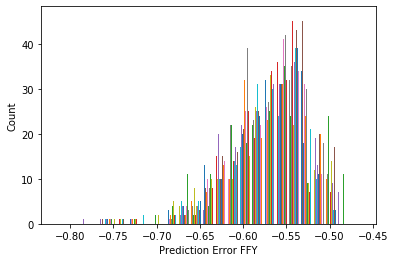

In [79]:
error =test_predictions - np.array(y_test)
plt.hist(error, bins=25)
plt.xlabel("Prediction Error FFY")
_ = plt.ylabel("Count")

## Conclusion

This Notebook introduced a few techniques to handle a regression problem <br>
* Mean Squared Error(MSE) is a common loss function used for regression problems (different loss functions are used for calssification problems)
* Evaluation Metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE)
* When Numeric input data features have values with different ranges, each feature should be scaled independently to the same range
* If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfittintg.
* Early stopping is a useful technique to prevent overfitting